In [98]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
TB_SA = pd.read_csv('data/tb_sa.csv')

In [6]:
## not including overseas territories such as falkland islands or french guiana
COUNTRIES = ['BRA', 'COL', 'ARG', 'PER', 'VEN', 'CHL', 'ECU', 'BOL', 'PRY', 'URY', 'GUY', 'SUR']

# Análise Exploratória

Daqui em diante seguiremos as escolhas de apresentação utilizadas no trabalho de exemplo disponibilizado pelo professor. Nessa seção mostraremos as tendências principais pertinentes para as análises que serão realizadas.

In [44]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
plt.style.use('seaborn-colorblind')
plt.ion()

## Número total de casos por ano

<BarContainer object of 20 artists>

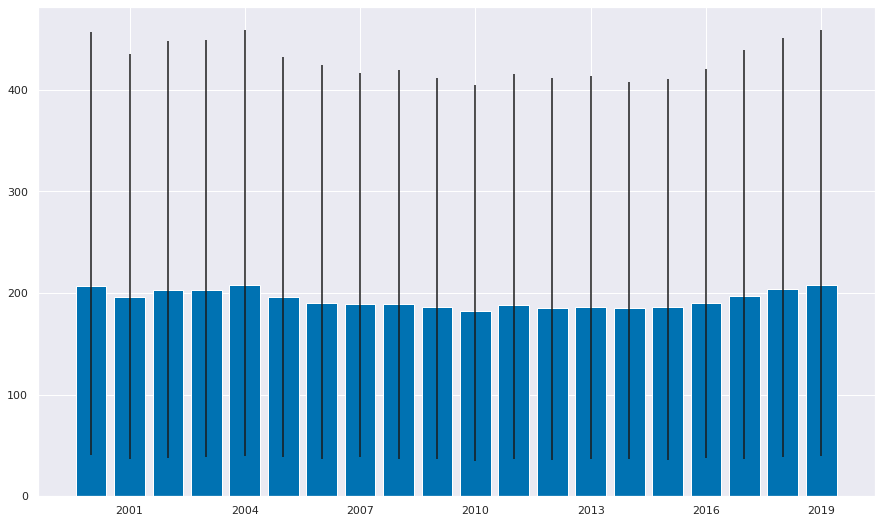

In [101]:
total_cases_by_year = TB_SA[['year', 'e_inc_num', 'e_inc_num_lo', 'e_inc_num_hi']].groupby('year').sum().reset_index()

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.bar(total_cases_by_year['year'], total_cases_by_year['e_inc_num']/1000, yerr=[total_cases_by_year['e_inc_num_lo']/1000, total_cases_by_year['e_inc_num_hi']/1000])


Podemos observar que a faixa de erro que a OMS atribui aos dados é muito grande, e que o número de casos ao longo dos anos foi estável, apresentando uma leve tendência decrescente na primeira década e crescente na segunda.

## Número de casos por ano por país

<Figure size 1080x648 with 0 Axes>

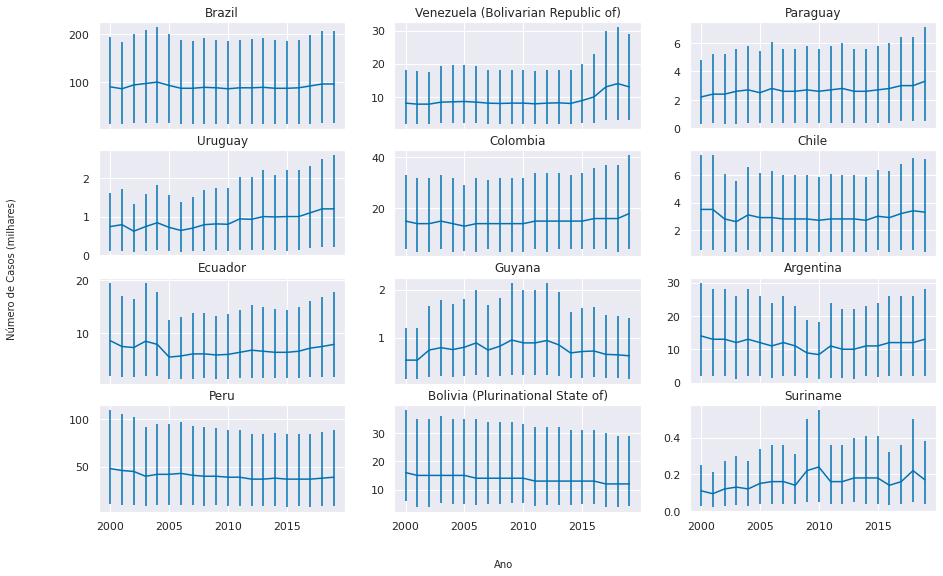

In [45]:
plt.figure()
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True)
fig.text(0.5, 0.04, 'Ano', ha='center')
fig.text(0.04, 0.5, 'Número de Casos (milhares)', va='center', rotation='vertical')
for i in range(12):
  country_data = TB_SA[TB_SA['iso3'] == COUNTRIES[i]]
  country_name = country_data.iloc[0]['country']

  ax = axs[i % 4, i % 3]
  ax.errorbar(country_data['year'], country_data['e_inc_num']/1000, yerr=[country_data['e_inc_num_lo']/1000, country_data['e_inc_num_hi']/1000])
  ax.set_title(country_name)

A população varia muito entre os diversos países; O Brasil em particular possui metade da população da América do Sul e por isso possui muito mais casos totais que os demais países analisados individualmente.

In [61]:
def getDataByXHab(data, column, X=100000):
  return data[column]/data['e_pop_num']*X

<Figure size 1080x648 with 0 Axes>

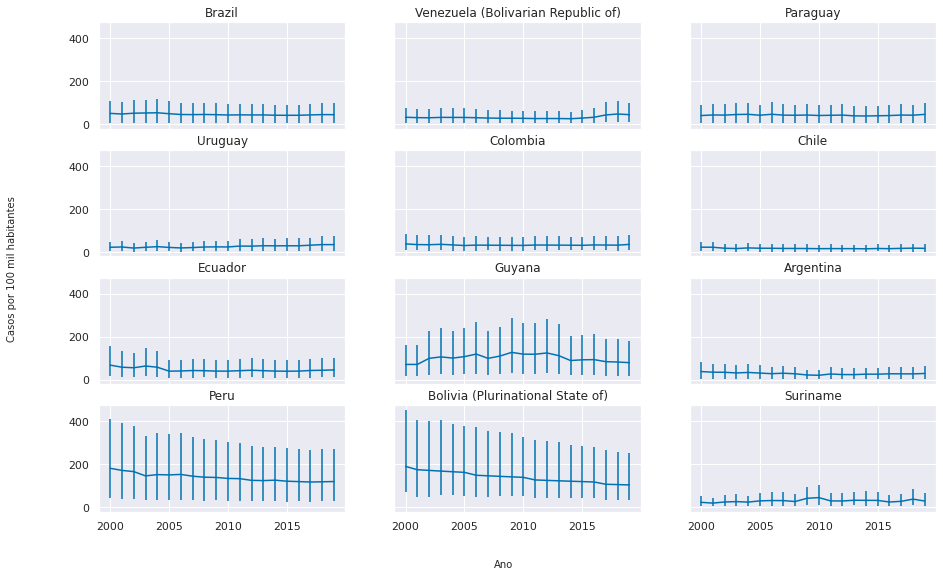

In [63]:
plt.figure()
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Ano', ha='center')
fig.text(0.04, 0.5, 'Casos por 100 mil habitantes', va='center', rotation='vertical')
for i in range(12):
  country_data = TB_SA[TB_SA['iso3'] == COUNTRIES[i]]
  country_name = country_data.iloc[0]['country']

  ax = axs[i % 4, i % 3]
  ax.errorbar(country_data['year'], getDataByXHab(country_data, 'e_inc_num'), yerr=[getDataByXHab(country_data, 'e_inc_num_lo'), getDataByXHab(country_data, 'e_inc_num_hi')])
  ax.set_title(country_name)

Casos a cada 100 mil habitantes é uma métrica mais interessante, que permite uma comparação mais justa entre países. Em particular observa-se que Peru, Bolívia e Guiana possuem, proporcionalmente, muito mais casos que os demais países, e uma faixa de erro também muito mais expressiva.

## Número estimado de mortes por ano por país

<Figure size 1080x648 with 0 Axes>

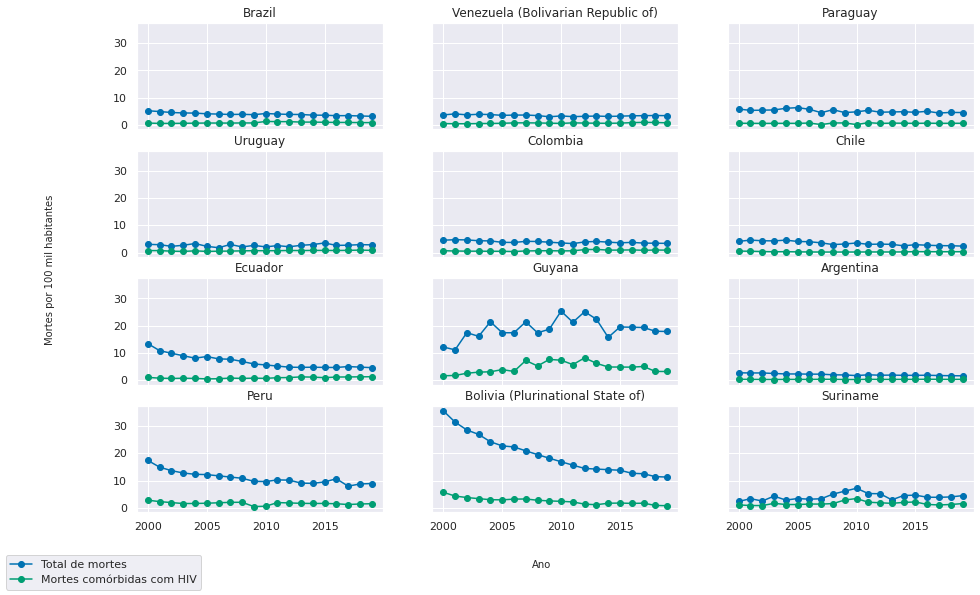

In [80]:
plt.figure()
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)

fig.text(0.5, 0.04, 'Ano', ha='center')
fig.text(0.04, 0.5, 'Mortes por 100 mil habitantes', va='center', rotation='vertical')

ax = None
for i in range(12):
  country_data = TB_SA[TB_SA['iso3'] == COUNTRIES[i]]
  country_name = country_data.iloc[0]['country']

  ax = axs[i % 4, i % 3]
  ax.errorbar(
      country_data['year'],
      getDataByXHab(country_data, 'e_mort_num'),
      label="Total de mortes",
      marker="o"
  )
  ax.errorbar(
      country_data['year'],
      getDataByXHab(country_data, 'e_mort_tbhiv_num'),
      label="Mortes comórbidas com HIV",
      marker="o"
  )
  ax.set_title(country_name)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left')

Aqui observamos o número médio estimado de mortes, e quantas dessas foram comórbidas com HIV. Na maioria dos países ambas as variáveis parecem seguir a mesma tendência, com o detalhe que em países como Guiana e Bolívia podemos observar que a mortalidade geral cresce e cai proporcionalmente mais do que a mortalidade comórbida com HIV.

Além disso, é observado o decrescimento proporcional significativo nos últimos anos no número de casos na Bolívia, no Equador e no Peru, e a aparente dificuldade da Guiana em controlar a doença.

<Figure size 1080x648 with 0 Axes>

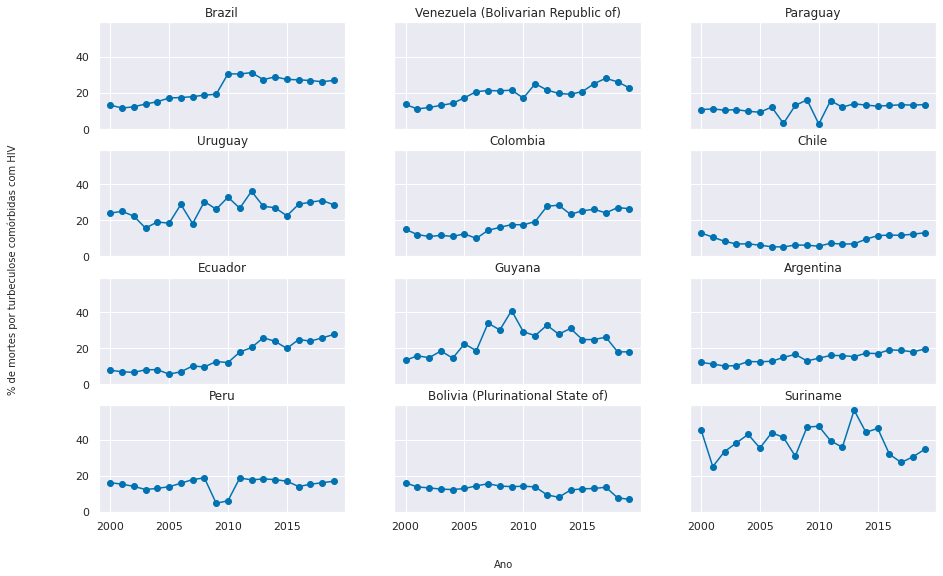

In [90]:
plt.figure()
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)

fig.text(0.5, 0.04, 'Ano', ha='center')
fig.text(0.04, 0.5, '% de mortes por turbeculose comórbidas com HIV', va='center', rotation='vertical')

#ax = None
for i in range(12):
  country_data = TB_SA[TB_SA['iso3'] == COUNTRIES[i]]
  country_name = country_data.iloc[0]['country']

  ax = axs[i % 4, i % 3]
  ax.errorbar(
      country_data['year'],
      country_data['e_mort_tbhiv_num']/country_data['e_mort_num']*100,
      marker="o"
  )
  ax.set_title(country_name)

<Figure size 1080x648 with 0 Axes>

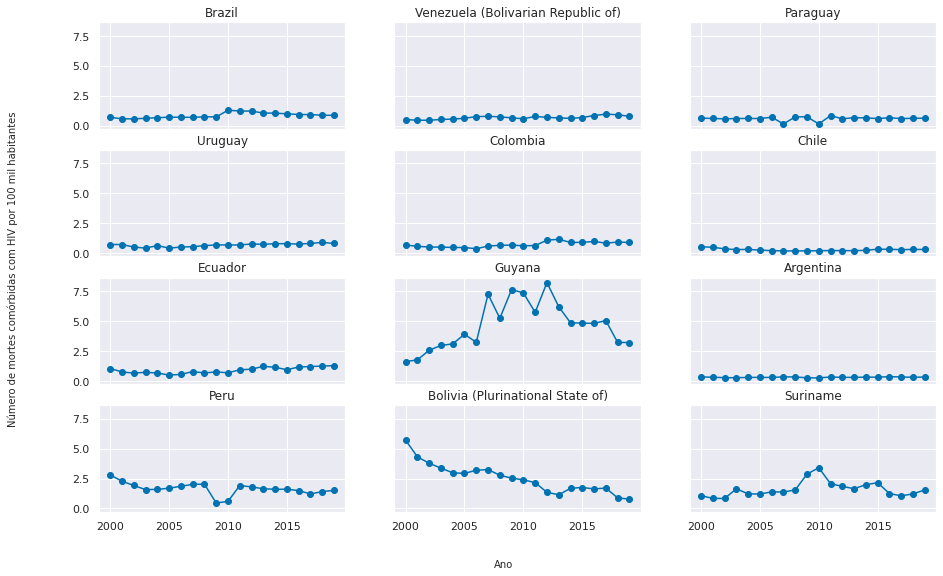

In [92]:
plt.figure()
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)

fig.text(0.5, 0.04, 'Ano', ha='center')
fig.text(0.04, 0.5, 'Número de mortes comórbidas com HIV por 100 mil habitantes', va='center', rotation='vertical')

#ax = None
for i in range(12):
  country_data = TB_SA[TB_SA['iso3'] == COUNTRIES[i]]
  country_name = country_data.iloc[0]['country']

  ax = axs[i % 4, i % 3]
  ax.errorbar(
      country_data['year'],
      getDataByXHab(country_data, 'e_mort_tbhiv_num'),
      marker="o"
  )
  ax.set_title(country_name)

Finalmente, analisamos o percentual de mortes por tuberculose que foram comórbidas com HIV, e podemos observar uma tendência geral de crescimento. Além disso podemos ver que o número de mortes comórbidas com HIV por 100 mil habitantes é estável na maioria dos países. Observando isso e as tendências anteriores, podemos concluir que, conforme os países combatem a doença e conseguem diminuir o número total de mortes, o número de mortes de infectados que são HIV-positivos tende a se manter o mesmo, aumentando em percentual conforme o total diminui.

## Total de novos casos e reinfecção por ano por país

<Figure size 1080x648 with 0 Axes>

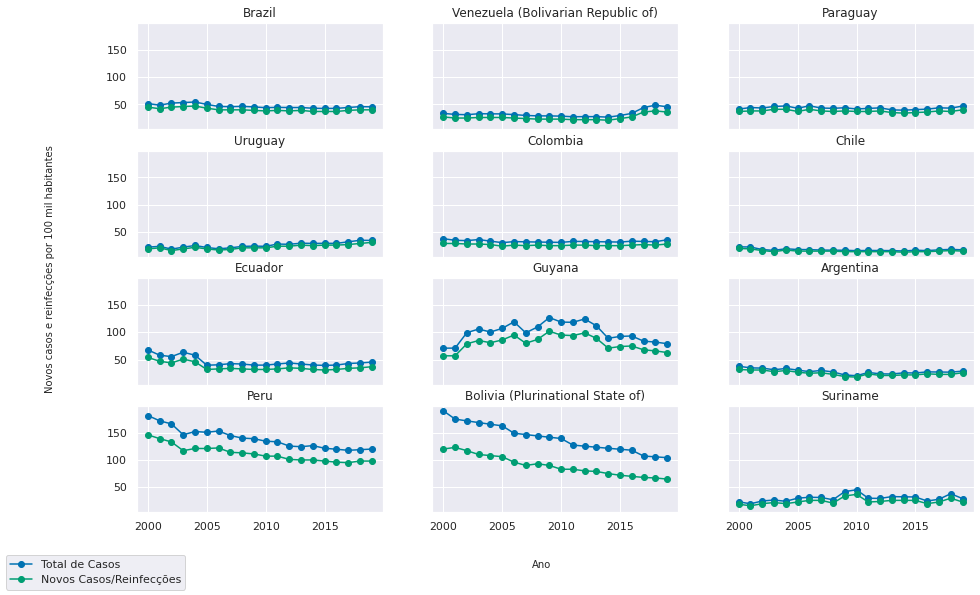

In [85]:
plt.figure()
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)

fig.text(0.5, 0.04, 'Ano', ha='center')
fig.text(0.04, 0.5, 'Novos casos e reinfecções por 100 mil habitantes', va='center', rotation='vertical')

ax = None
for i in range(12):
  country_data = TB_SA[TB_SA['iso3'] == COUNTRIES[i]]
  country_name = country_data.iloc[0]['country']

  ax = axs[i % 4, i % 3]
  ax.errorbar(
      country_data['year'],
      getDataByXHab(country_data, 'e_inc_num'),
      label="Total de Casos",
      marker="o"
  )
  ax.errorbar(
      country_data['year'],
      country_data['c_newinc_100k'],
      label="Novos Casos/Reinfecções",
      marker="o"
  )
  ax.set_title(country_name)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left')

Ao comparar o número de novos casos/reinfecções com o total de casos por ano observamos que, na maioria dos países, a maioria dos casos ativos em um ano são casos novos. Fogem da tendência os três países que inicialmente observamos terem uma quantidade expressiva de casos, quando comparados aos demais: Peru, Bolívia e Guiana. Isso implica que uma grande quantidade de casos está passando para o ano seguinte antes de serem curados.

## Cobertura de Tratamento

<Figure size 1080x648 with 0 Axes>

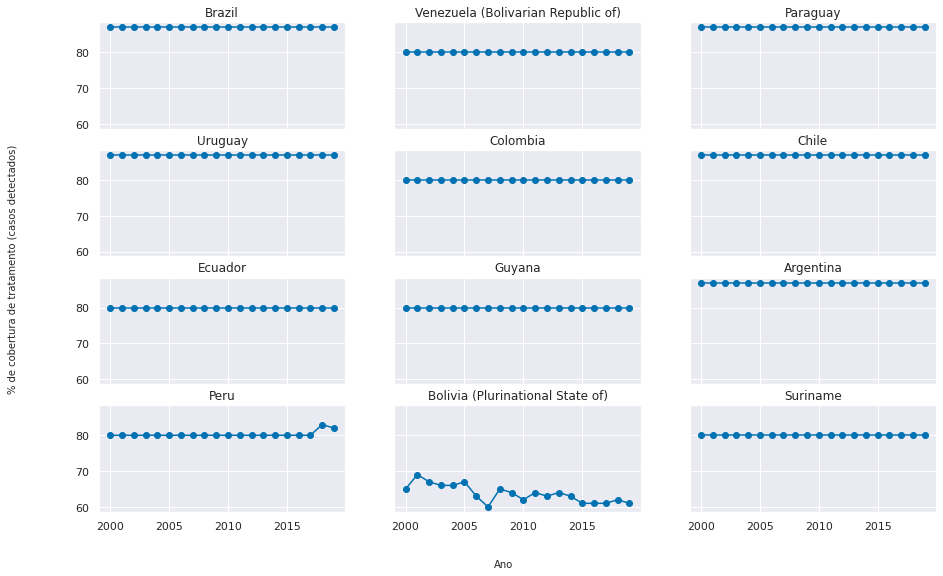

In [94]:
plt.figure()
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)

fig.text(0.5, 0.04, 'Ano', ha='center')
fig.text(0.04, 0.5, '% de cobertura de tratamento (casos detectados)', va='center', rotation='vertical')

#ax = None
for i in range(12):
  country_data = TB_SA[TB_SA['iso3'] == COUNTRIES[i]]
  country_name = country_data.iloc[0]['country']

  ax = axs[i % 4, i % 3]
  ax.errorbar(
      country_data['year'],
      country_data['c_cdr'],
      marker="o"
  )
  ax.set_title(country_name)

Aqui podemos ver a eficácia de detecção e tratamento de casos de cada país. Podemos separar em três grupos:
Países como Brasil, Uruguai e Argentina, que detectam e tratam mais que 80% dos casos;
Países como Equador, Guiana e Suriname, que detectam e tratam aproximadamente 80% dos casos;
A Bolívia, que trata menos de 70% dos casos, e hoje aproxima-se de 60% de eficácia.